## Dataset Information

The Data set is contain total 317 images of covid-19 patient, include three class [covid, Normal, Viral pneumonia]

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from tensorflow.keras import utils
from glob import glob
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
## mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## loading the training and testing data
train_dir = '/content/drive/MyDrive/COVID 19/Covid19-dataset/train'
test_dir = '/content/drive/MyDrive/COVID 19/Covid19-dataset/test'

In [ ]:
## Generating training and testing data
train_datagen = ImageDataGenerator(rescale=(1./255),
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   )

test_datagen = ImageDataGenerator(rescale=(1. /255),
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                  )

train_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 240 images belonging to 3 classes.
Found 61 images belonging to 3 classes.


**Plotting Training images**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
%matplotlib inline

In [ ]:
def plot(img,figsize=(20,10),rows=4, interp=False,title=None):
  fig=plt.figure(figsize=figsize)
  cols = len(img)// rows if len(img) % 2 == 0 else len(img) // rows + 1

  for i in range (len(img)):
    sp = fig.add_subplot(rows,cols,i+1)
    sp.axis('off')
    sp.set_title(class_names[title[i].tolist().index(1)],fontsize=16)
    plt.imshow(img[i])

class_names=["Covid","Normal","Viral Pneumonia"]

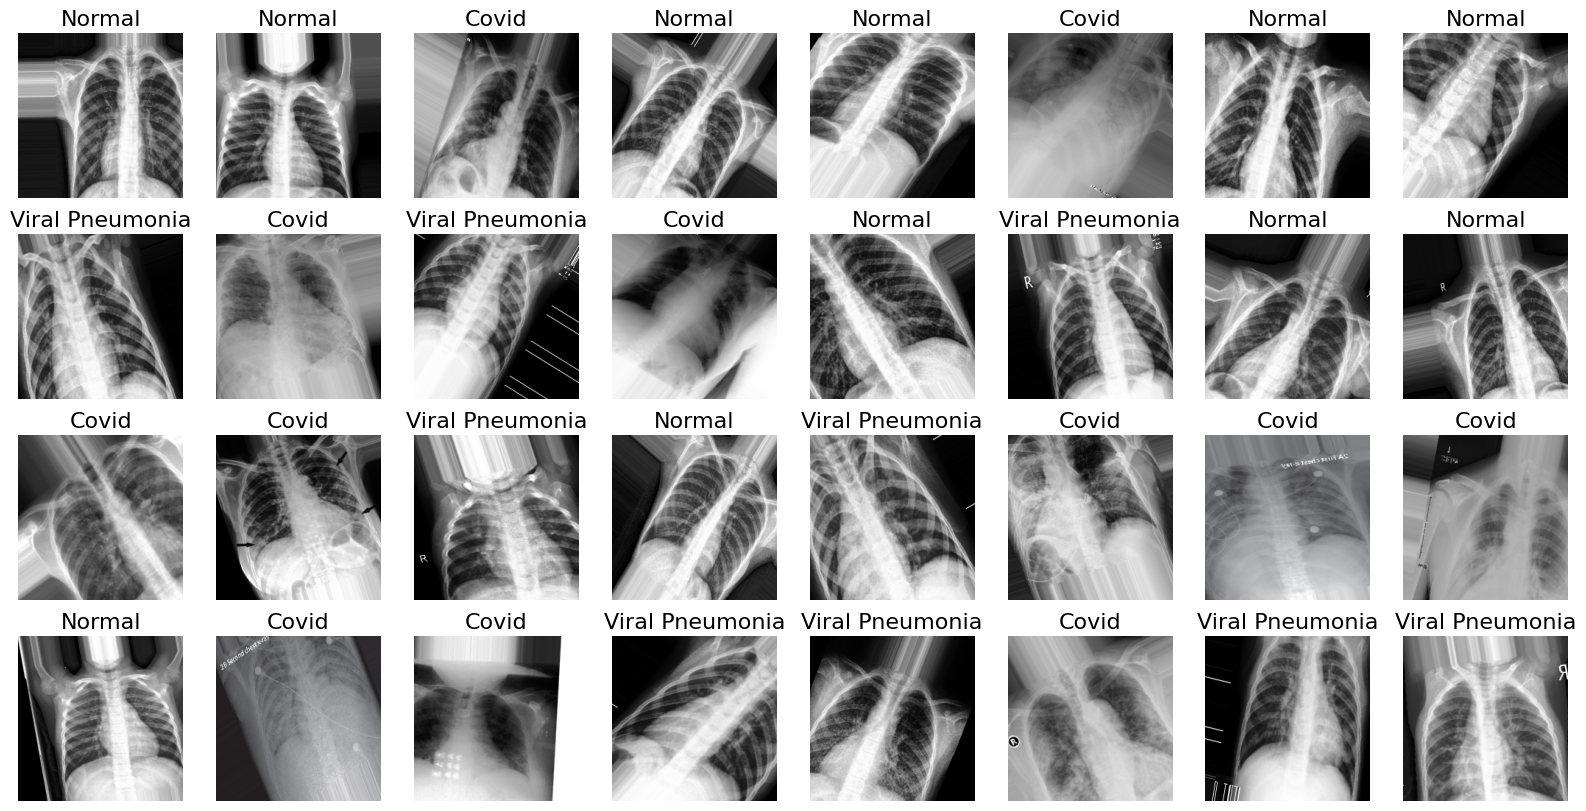

In [ ]:
img, labels=next(train_set)
plot(img,title=labels)

In [ ]:
from tensorflow.keras.layers import Activation
from keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(224,224,3))) # Changed input_shape to (224, 224, 3)
model.add(layers.MaxPool2D(pool_size=(2,2)))


model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Dropout(rate=0.5))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation ='softmax'))

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax'),  # Output layer for 3 classes
])

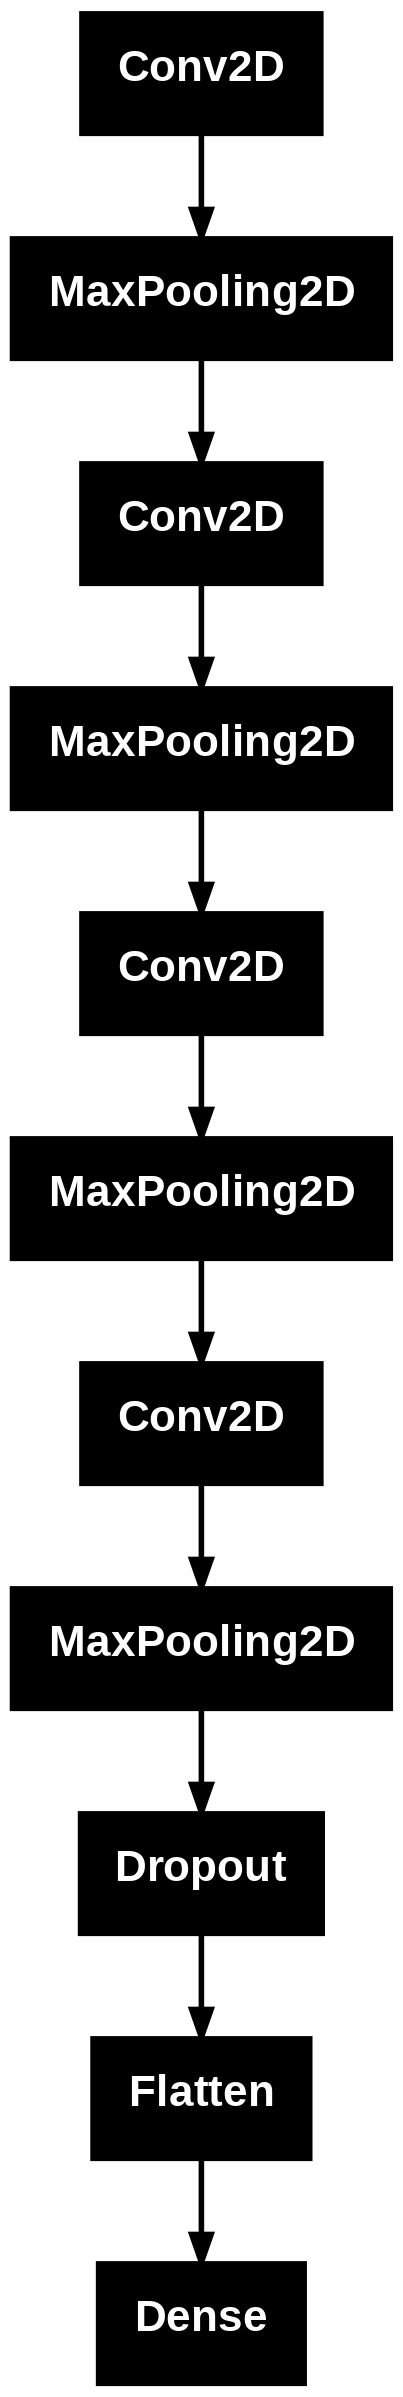

In [ ]:
import tensorflow as tf #Importing the tensorflow module
import pydotplus
tf.keras.utils.plot_model(model) #Using the updated import

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(0.01),
    metrics=['accuracy']

)

In [ ]:
hist = model.fit(train_set, epochs=50, steps_per_epoch=5, validation_data=test_set, verbose=2)

Epoch 1/50
5/5 - 77s - 15s/step - accuracy: 0.3313 - loss: 20.3493 - val_accuracy: 0.3443 - val_loss: 5.6129
Epoch 2/50
5/5 - 15s - 3s/step - accuracy: 0.5375 - loss: 3.2314 - val_accuracy: 0.3443 - val_loss: 1.5950
Epoch 3/50
5/5 - 86s - 17s/step - accuracy: 0.3611 - loss: 1.1539 - val_accuracy: 0.3279 - val_loss: 1.1110
Epoch 4/50
5/5 - 18s - 4s/step - accuracy: 0.3333 - loss: 1.0947 - val_accuracy: 0.3443 - val_loss: 1.1057
Epoch 5/50
5/5 - 37s - 7s/step - accuracy: 0.4500 - loss: 1.0809 - val_accuracy: 0.3443 - val_loss: 1.1230
Epoch 6/50
5/5 - 15s - 3s/step - accuracy: 0.4500 - loss: 1.0705 - val_accuracy: 0.3443 - val_loss: 1.1345
Epoch 7/50
5/5 - 69s - 14s/step - accuracy: 0.4028 - loss: 1.0957 - val_accuracy: 0.3443 - val_loss: 1.1378
Epoch 8/50
5/5 - 16s - 3s/step - accuracy: 0.5208 - loss: 1.0346 - val_accuracy: 0.3443 - val_loss: 1.1385
Epoch 9/50
5/5 - 35s - 7s/step - accuracy: 0.4167 - loss: 1.0950 - val_accuracy: 0.3443 - val_loss: 1.1287
Epoch 10/50
5/5 - 17s - 3s/step -

KeyboardInterrupt: 

In [ ]:
history = model.fit(
    train_set,
    epochs=50,
    validation_data=test_set,
    steps_per_epoch=5
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.4424 - loss: 139.4235 - val_accuracy: 0.3279 - val_loss: 1.1313
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.2954 - loss: 1.1610 - val_accuracy: 0.3279 - val_loss: 1.1160
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.2628 - loss: 1.1295 - val_accuracy: 0.3443 - val_loss: 1.0993
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5008 - loss: 1.0871 - val_accuracy: 0.3443 - val_loss: 1.1000
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.4326 - loss: 1.0901 - val_accuracy: 0.3443 - val_loss: 1.1019
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.4094 - loss: 1.0888 - val_accuracy: 0.3443 - val_loss: 1.1038
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.4301 - loss: 1.0712 - val_accuracy: 0.3443 - val_loss: 1.1078
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.4694 - loss: 1.0786 - val_accuracy: 0.3443 - val_loss: 1.1100
Epoch 

In [ ]:
img_size = [224,224]
vgg = VGG16(input_shape = img_size + [3] , weights = 'imagenet' , include_top = False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
 for layers in vgg.layers:
  layers.trainable = False


In [ ]:
folders = glob("/content/drive/MyDrive/COVID 19/Covid19-dataset/train/*")
print(len(folders))


3


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders),activation='softmax')(x)
model16 = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model16.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │          75,267 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,789,955 (56.42 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
!pip install pydot graphviz

In [ ]:
from tensorflow.keras.optimizers import Adam

model16.compile(loss='categorical_crossentropy',optimizer=Adam(0.01),metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

check = ModelCheckpoint(filepath = 'vgg16model.keras', verbose=2,save_best_only=True)

hist = model16.fit(train_set, epochs=50, steps_per_epoch=5, validation_data=test_set, verbose=2, callbacks=check)



Epoch 1/50

Epoch 1: val_loss improved from inf to 17.84939, saving model to vgg16model.keras
5/5 - 189s - 38s/step - accuracy: 0.3742 - loss: 19.8781 - val_accuracy: 0.6515 - val_loss: 17.8494
Epoch 2/50

Epoch 2: val_loss improved from 17.84939 to 13.47841, saving model to vgg16model.keras
5/5 - 95s - 19s/step - accuracy: 0.5938 - loss: 19.3034 - val_accuracy: 0.6061 - val_loss: 13.4784
Epoch 3/50

Epoch 3: val_loss improved from 13.47841 to 11.00871, saving model to vgg16model.keras
5/5 - 180s - 36s/step - accuracy: 0.6194 - loss: 7.2612 - val_accuracy: 0.4394 - val_loss: 11.0087
Epoch 4/50

Epoch 4: val_loss improved from 11.00871 to 1.14981, saving model to vgg16model.keras
5/5 - 95s - 19s/step - accuracy: 0.6562 - loss: 4.6627 - val_accuracy: 0.7727 - val_loss: 1.1498
Epoch 5/50

Epoch 5: val_loss did not improve from 1.14981
5/5 - 139s - 28s/step - accuracy: 0.7032 - loss: 2.7185 - val_accuracy: 0.7879 - val_loss: 1.6818
Epoch 6/50

Epoch 6: val_loss did not improve from 1.14981

In [ ]:
train_result = model16.evaluate(train_set)
print("Train Accuracy & Loss:",train_result)

test_result = model16.evaluate(test_set)
print("Testing Accuracy & Loss",test_result)

8/8 ━━━━━━━━━━━━━━━━━━━━ 150s 19s/step - accuracy: 0.8675 - loss: 0.8379
Train Accuracy & Loss: [0.8655459880828857, 0.8645418286323547]
3/3 ━━━━━━━━━━━━━━━━━━━━ 38s 9s/step - accuracy: 0.7306 - loss: 2.9184
Testing Accuracy & Loss [2.853947877883911, 0.7424242496490479]


In [ ]:
# Creating dataframe
import pandas as pd
df = pd.DataFrame(zip(train_result, test_result),columns=['Train','Test'],index=['Loss','Accuracy'])
df

,Train,Test
Loss,0.865546,2.853948
Accuracy,0.864542,0.742424


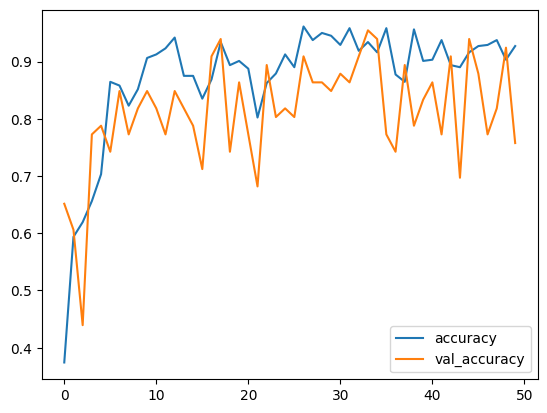

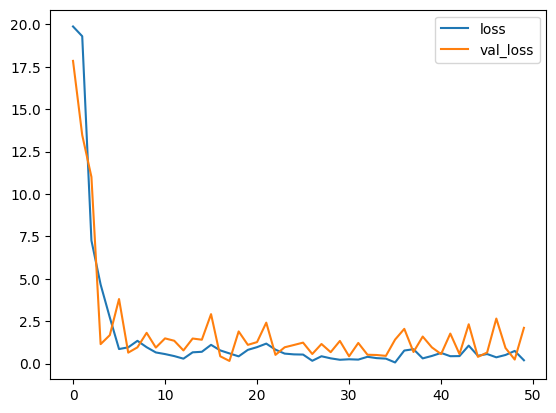

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotting training and testing Accuracy as well as loss & val loss
import matplotlib.pyplot as plt # Import necessary library for plotting

def plot_curve(hist):
  acc      = hist.history['accuracy'] # Access history data using the hist object
  val_acc  = hist.history['val_accuracy'] # Access history data using the hist object
  loss     = hist.history['loss'] # Access history data using the hist object
  val_loss = hist.history['val_loss'] # Access history data using the hist object
  epochs   = range(len(acc))

  plt.plot(epochs, acc, label='accuracy')
  plt.plot(epochs, val_acc, label='val_accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, label='loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.legend()
  plt.figure()

plot_curve(hist)

**VGG19**

In [ ]:
vgg1 = VGG19(input_shape= img_size + [3], weights='imagenet', include_top=False)


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
for layer in vgg1.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg1.output)
prediction = Dense(len(folders), activation='softmax')(x)
model19 = Model(inputs=vgg1.input, outputs=prediction)

In [ ]:
model19.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,099,651 (76.67 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
from tensorflow.keras.optimizers import Adam
model19.compile(loss='categorical_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])

In [ ]:
# Fit(Train) the model
from keras.callbacks import ModelCheckpoint

# Change the filepath to end with '.keras'
check = ModelCheckpoint(filepath= 'vgg19model.keras', verbose=1, save_best_only=2)

History = model19.fit(train_set, epochs=40,
                                steps_per_epoch=5,
                                validation_data=test_set,
                                verbose=2, callbacks=check )

Epoch 1/40

Epoch 1: val_loss improved from inf to 20.63691, saving model to vgg19model.keras
5/5 - 289s - 58s/step - accuracy: 0.4062 - loss: 14.7635 - val_accuracy: 0.5738 - val_loss: 20.6369
Epoch 2/40

Epoch 2: val_loss improved from 20.63691 to 5.26785, saving model to vgg19model.keras
5/5 - 108s - 22s/step - accuracy: 0.6250 - loss: 13.2970 - val_accuracy: 0.5410 - val_loss: 5.2678
Epoch 3/40

Epoch 3: val_loss did not improve from 5.26785
5/5 - 167s - 33s/step - accuracy: 0.6187 - loss: 5.9019 - val_accuracy: 0.6066 - val_loss: 6.9983
Epoch 4/40

Epoch 4: val_loss did not improve from 5.26785
5/5 - 143s - 29s/step - accuracy: 0.6875 - loss: 6.1025 - val_accuracy: 0.6230 - val_loss: 6.5529
Epoch 5/40

Epoch 5: val_loss improved from 5.26785 to 1.37647, saving model to vgg19model.keras
5/5 - 207s - 41s/step - accuracy: 0.6812 - loss: 3.7776 - val_accuracy: 0.7705 - val_loss: 1.3765
Epoch 6/40

Epoch 6: val_loss did not improve from 1.37647
5/5 - 106s - 21s/step - accuracy: 0.6875 

In [ ]:
train_result = model19.evaluate(train_set)
print("Train Accuracy & Loss:",train_result)

test_result = model19.evaluate(test_set)
print("Testing Accuracy & Loss",test_result)

8/8 ━━━━━━━━━━━━━━━━━━━━ 183s 22s/step - accuracy: 0.9329 - loss: 0.5036
Train Accuracy & Loss: [0.5688790678977966, 0.9166666865348816]
2/2 ━━━━━━━━━━━━━━━━━━━━ 44s 21s/step - accuracy: 0.9672 - loss: 0.2793
Testing Accuracy & Loss [0.4052636921405792, 0.9508196711540222]


In [ ]:
# Creating dataframe
import pandas as pd
df = pd.DataFrame(zip(train_result, test_result),columns=['Train','Test'],index=['Loss','Accuracy'])
df

,Train,Test
Loss,0.568879,0.405264
Accuracy,0.916667,0.950820


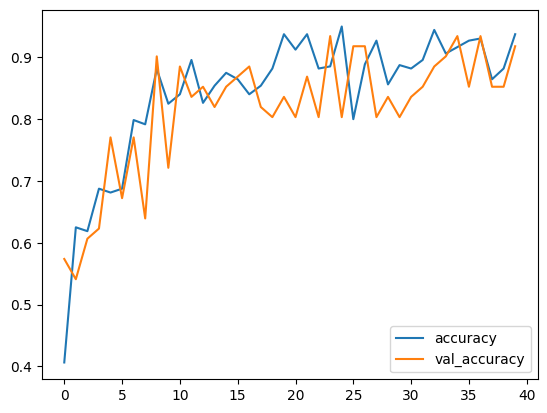

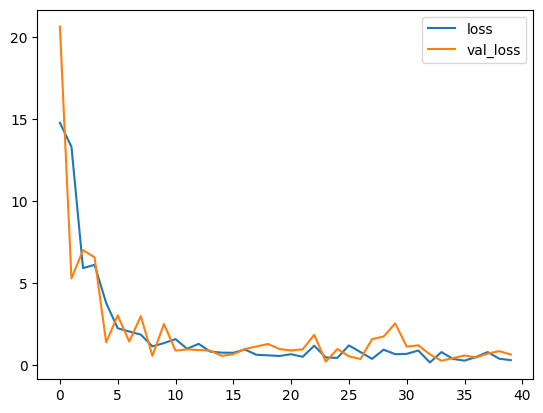

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

def plot_curve(History): # Changed the argument name to History
    acc = History.history['accuracy']
    val_acc = History.history['val_accuracy']
    loss = History.history['loss']
    val_loss = History.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='accuracy')
    plt.plot(epochs, val_acc, label='val_accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, label='loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.legend()
    plt.figure()

# Call the function with the correct variable name
plot_curve(History) # Changed the argument to History

In [ ]:
# Saving model with the help of h5
model19.save('VGG19_Model.h5')

In [ ]:
y_prediction = model19.predict(test_set)
y_prediction

2/2 ━━━━━━━━━━━━━━━━━━━━ 47s 23s/step


array([[1.0940003e-09, 1.3726279e-14, 9.9999994e-01],
       [9.9999899e-01, 8.6155399e-07, 1.0107762e-07],
       [6.0343662e-21, 9.9999994e-01, 3.6373365e-12],
       [9.9999994e-01, 1.7357329e-11, 2.5246594e-21],
       [1.2846107e-07, 2.4273302e-07, 9.9999958e-01],
       [2.4492459e-05, 1.9500671e-08, 9.9997538e-01],
       [9.9999994e-01, 6.3399042e-13, 5.7457851e-11],
       [9.9999994e-01, 1.2565439e-11, 5.3176720e-15],
       [9.9999982e-01, 4.5478253e-13, 1.5420758e-07],
       [1.1586306e-07, 9.9999982e-01, 1.3965249e-17],
       [9.9999994e-01, 4.5684879e-11, 1.4935863e-15],
       [2.0289793e-14, 9.9999946e-01, 5.1212754e-07],
       [4.8351911e-08, 1.4348622e-05, 9.9998552e-01],
       [2.8018850e-15, 9.9999994e-01, 4.3514727e-11],
       [9.9997634e-01, 1.4900546e-07, 2.3480357e-05],
       [9.9999994e-01, 2.0663453e-13, 8.9535833e-13],
       [4.9673655e-12, 9.9999994e-01, 9.1814931e-11],
       [2.9856141e-18, 9.9999982e-01, 6.7563704e-08],
       [9.9999994e-01, 5.169

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('VGG19_Model.h5')

In [ ]:
img = image.load_img('/content/drive/MyDrive/COVID 19/Covid19-dataset/test/Covid/0100.jpeg',target_size=(224,224))

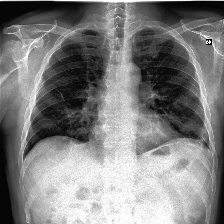

In [ ]:
img

In [ ]:
from tensorflow.keras.preprocessing import image
array = image.img_to_array(img)
array

array([[[249., 249., 249.],
        [241., 241., 241.],
        [241., 241., 241.],
        ...,
        [212., 212., 212.],
        [212., 212., 212.],
        [217., 217., 217.]],

       [[ 72.,  72.,  72.],
        [ 55.,  55.,  55.],
        [ 47.,  47.,  47.],
        ...,
        [  6.,   6.,   6.],
        [  5.,   5.,   5.],
        [  7.,   7.,   7.]],

       [[  4.,   4.,   4.],
        [  5.,   5.,   5.],
        [  6.,   6.,   6.],
        ...,
        [  6.,   6.,   6.],
        [  4.,   4.,   4.],
        [  6.,   6.,   6.]],

       ...,

       [[  6.,   6.,   6.],
        [  6.,   6.,   6.],
        [  6.,   6.,   6.],
        ...,
        [  8.,   8.,   8.],
        [  8.,   8.,   8.],
        [  6.,   6.,   6.]],

       [[  6.,   6.,   6.],
        [  6.,   6.,   6.],
        [  6.,   6.,   6.],
        ...,
        [  8.,   8.,   8.],
        [  7.,   7.,   7.],
        [  6.,   6.,   6.]],

       [[  6.,   6.,   6.],
        [  6.,   6.,   6.],
        [  6.,  

In [ ]:
# Scaling
array = array/255

In [ ]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input

array = np.expand_dims(array, axis=0)
image_data = preprocess_input(array)

# Getting the shape
image_data.shape

(1, 1, 224, 224, 3)

In [ ]:
# Reshape image_data to remove the extra dimension
image_data = image_data.reshape(1, 224, 224, 3)

# Now predict using the reshaped data
model.predict(image_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[9.9999607e-01, 2.8688541e-08, 3.9369033e-06]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


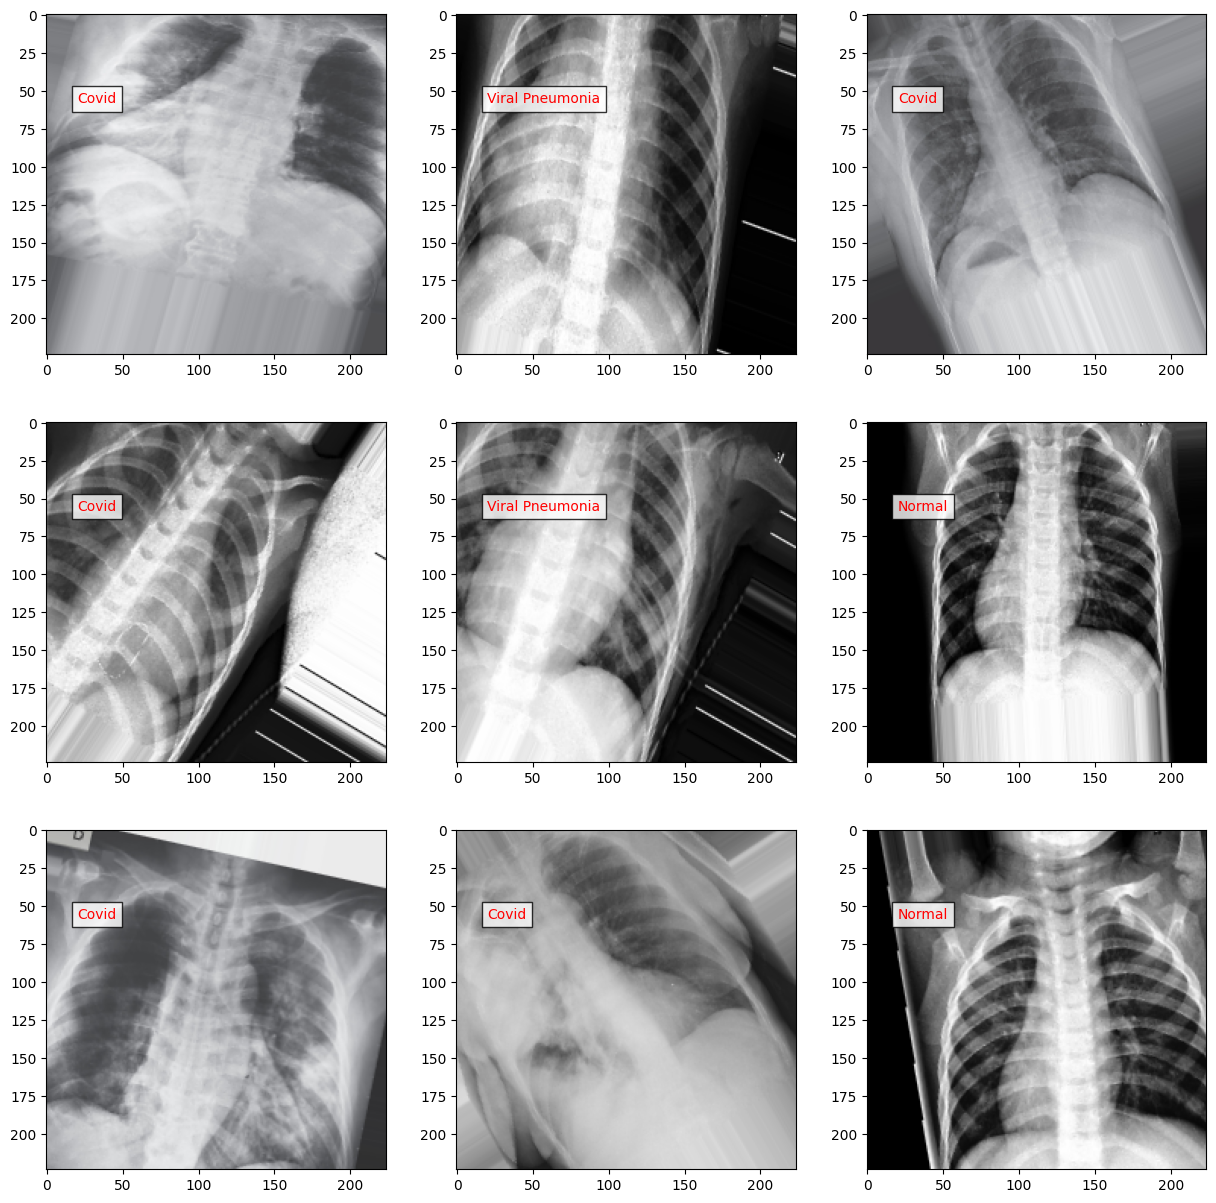

In [ ]:
# Visualise the prediction of the model
imgs, labels = next(test_set)
fig = plt.figure(figsize=(15, 15))
columns = 3
rows = 3
class_names = ['Covid', 'Normal', 'Viral Pneumonia']

for i in range(columns * rows):
    fig.add_subplot(rows, columns, i + 1)
    img_t = np.expand_dims(imgs[i], axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    # Fix: Check if idx is within the valid range of class_names
    if 0 <= idx < len(class_names):
        plt.text(20, 58, class_names[idx], color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
    else:
        plt.text(20, 58, f"Unknown (idx={idx})", color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
    plt.imshow(imgs[i])